Количество здоровых пациентов:  380
Глубина дерева:  8
confusion_matrix:
 [[76 15]
 [ 8 17]]
Parameters: TP = 17, TN = 76, FP = 15, FN = 8
Accuracy: 0.802
TPR / Sensitivity / Recall: 0.680
FPR: 0.165
TNR / Specificity: 0.835
Precision: 0.531
f1-score for class 1 (with diabetes): 0.596

classification_report:
               precision    recall  f1-score   support

           0      0.905     0.835     0.869        91
           1      0.531     0.680     0.596        25

    accuracy                          0.802       116
   macro avg      0.718     0.758     0.733       116
weighted avg      0.824     0.802     0.810       116

[1]
[1]
[0]
[0]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


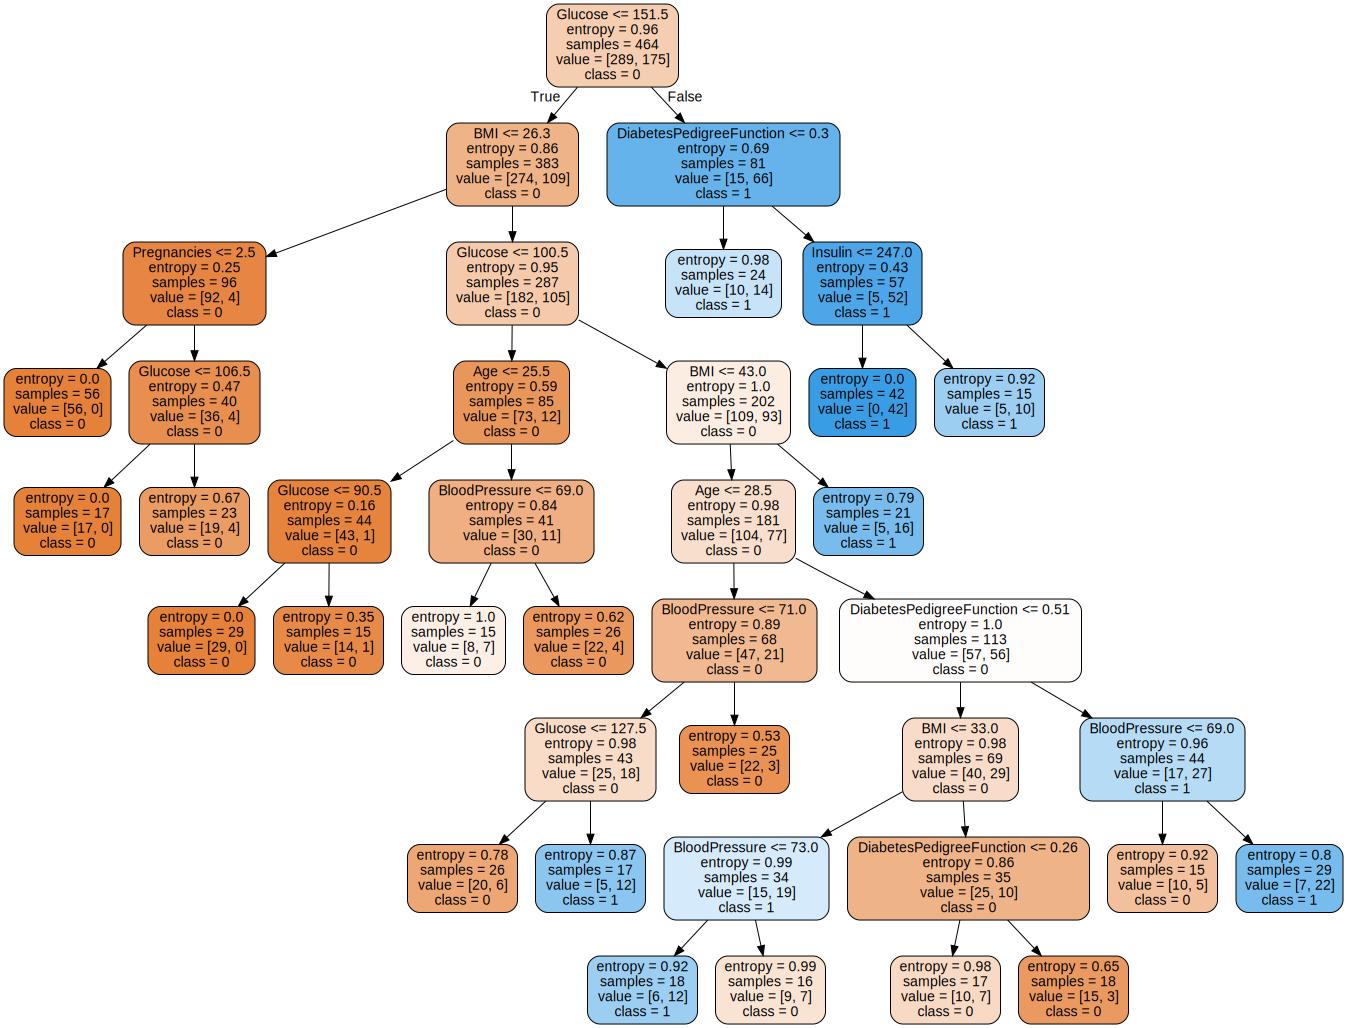

In [ ]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

df = pd.read_csv('diabetes.csv', delimiter=',', decimal='.')
df_new = pd.read_csv('diabetes.csv', nrows = 580)

print('Количество здоровых пациентов: ', df_new['Outcome'].value_counts()[0])

X = df_new.loc[:, 'Pregnancies': 'Age']
y = df_new.loc[:, 'Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, shuffle = False)

clf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes = 25, min_samples_leaf = 15, random_state = 2020)
clf.fit(X_train, y_train)

print('Глубина дерева: ', clf.get_depth())

y_pred = clf.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("confusion_matrix:\n", confusion_matrix)
TP = confusion_matrix[1][1]
TN = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
print(f"Parameters: TP = {TP}, TN = {TN}, FP = {FP}, FN = {FN}")
print(f"Accuracy: {(TP+TN)/(TP+FP+FN+TN):.3f}")
print(f"TPR / Sensitivity / Recall: {TP/(TP+FN):.3f}")
print(f"FPR: {FP/(FP+TN):.3f}")
print(f"TNR / Specificity: {TN/(TN+FP):.3f}")
print(f"Precision: {TP/(TP+FP):.3f}")
print(f"f1-score for class 1 (with diabetes): {2*TP/(TP+FP)*TP/(TP+FN)/(TP/(TP+FP)+TP/(TP+FN)):.3f}")

print("\nclassification_report:\n", classification_report(y_test, y_pred, digits=3))

df = df.loc[:, 'Pregnancies': 'Age']

print(clf.predict(np.array(df.iloc[749]).reshape(1, -1)))
print(clf.predict(np.array(df.iloc[715]).reshape(1, -1)))
print(clf.predict(np.array(df.iloc[718]).reshape(1, -1)))
print(clf.predict(np.array(df.iloc[735]).reshape(1, -1)))

columns = list(X.columns)
export_graphviz(clf, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)
